In [18]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [19]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [20]:
path_vpf = '/home/ajana/VPF/'
path_cic = '/home/ajana/CIC'

In [21]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [22]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [23]:
vpf_data = []
full_data = []

for filename in os.listdir(path_cic):
    if filename.startswith('cic_galaxies'):
        pos = extractIndex(filename)
        cic = np.load(os.path.join(path_cic,filename))
        _,vpf = np.load(os.path.join(path_vpf,'vpf_'+filename[4:]))
        hist_cic,_ = np.histogram(cic,bins=10)
        hist_cic = hist_cic/np.sum(hist_cic)
        del cic
        hist_cic[np.where(hist_cic==0)] = 1e-10
        _temp = np.concatenate((vpf,np.log(hist_cic),f[pos]))
        del vpf
        full_data.append(_temp)

'''
for filename in os.listdir(path):
    if filename.startswith('vpf_galaxies'):
        pos = extractIndex(filename)
        _,vpf = np.load(os.path.join(path,filename))
        _temp = np.concatenate((vpf,f[pos]))
        inphase_data.append(_temp)
'''

"\nfor filename in os.listdir(path):\n    if filename.startswith('vpf_galaxies'):\n        pos = extractIndex(filename)\n        _,vpf = np.load(os.path.join(path,filename))\n        _temp = np.concatenate((vpf,f[pos]))\n        inphase_data.append(_temp)\n"

In [24]:
len(full_data)

4999

In [25]:
full_data = np.vstack((full_data))
#del inphase_data
#del data

np.random.shuffle(full_data)

In [55]:
#np.save('machine_learning_data.npy',full_data)

In [255]:
X_data = full_data[:,30:-5]
y_data = full_data[:,-5:]

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [257]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=2000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=True,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [258]:
reg_rf.score(X_test,y_test)

/home/ajana/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-0.5337932421107177

In [259]:
print (np.mean((y_rf - y_test)**2/(y_rf**2)*100, axis=0))

[3.84554966e-03 2.21232908e-03 3.35356813e+00 7.26169004e+00
 3.07152363e-01]


In [260]:
y_rf = pd.DataFrame(y_rf)
y_test = pd.DataFrame(y_test)

In [261]:
pd.concat([y_test,y_rf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,12.986739,13.983835,0.963826,1.312837,0.776013,13.031779,14.019282,1.111827,1.312675,0.778440
1,13.159507,14.093482,1.208545,0.969320,0.861662,13.094891,14.094469,0.999506,1.155517,0.901127
2,12.977591,14.123321,0.780417,0.875823,0.996252,13.019237,14.059478,0.926885,1.061562,1.008268
3,13.186191,14.048419,0.798480,0.971069,0.968582,13.024817,14.119480,0.794481,1.462671,0.925751
4,12.991605,13.990365,0.875567,1.297497,0.864571,13.049251,14.085359,0.980113,1.390792,0.899310
...,...,...,...,...,...,...,...,...,...,...
495,13.018463,14.030535,0.988322,1.490757,0.723209,13.014719,14.133844,1.160010,1.439865,0.828272
496,13.061856,13.998061,1.086599,0.768059,0.992472,13.075349,14.049767,1.180543,1.046634,0.944426
497,13.165332,14.098071,1.144828,1.061505,0.767183,13.177850,14.028727,1.016874,1.217656,0.726073
498,13.154363,14.012922,1.108257,0.867706,0.865585,13.148842,14.109162,0.849164,0.835024,0.855149


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

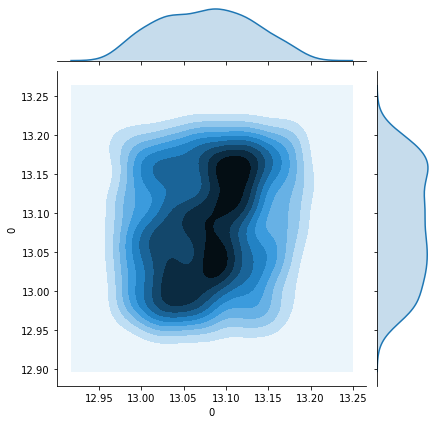

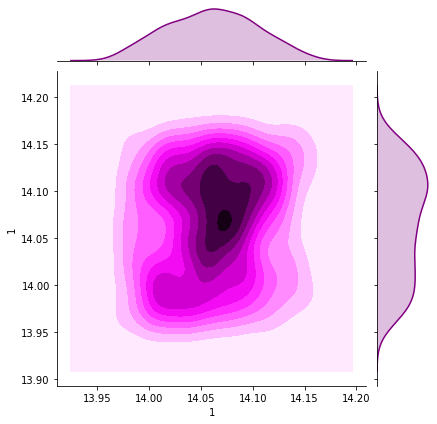

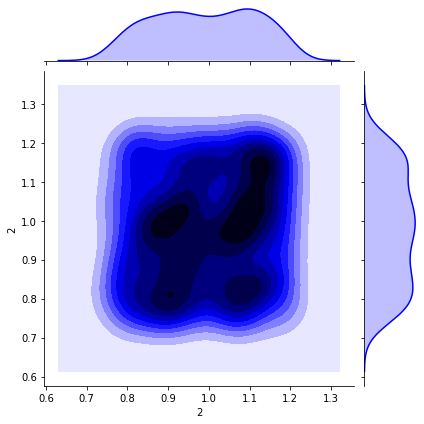

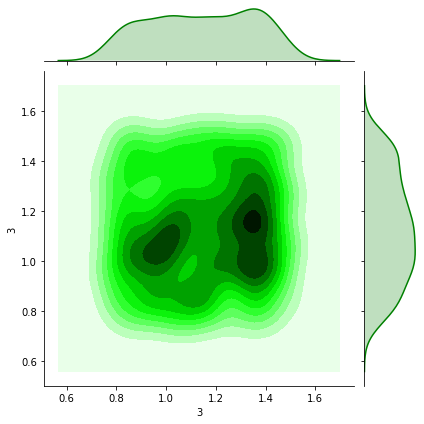

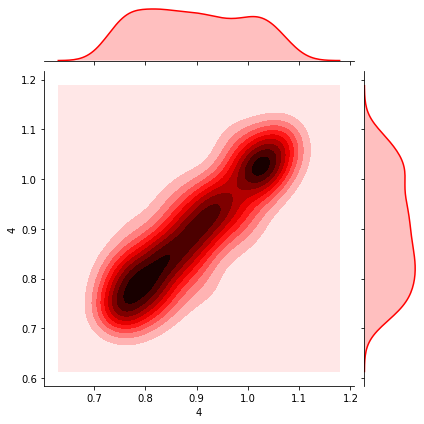

In [262]:
sns.jointplot(y_rf.iloc[:,0],y_test.iloc[:,0],kind = "kde")
sns.jointplot(y_rf.iloc[:,1],y_test.iloc[:,1],kind = 'kde',color='purple')
sns.jointplot(y_rf.iloc[:,2],y_test.iloc[:,2],kind = 'kde',color='blue')
sns.jointplot(y_rf.iloc[:,3],y_test.iloc[:,3],kind = 'kde',color='green')
sns.jointplot(y_rf.iloc[:,4],y_test.iloc[:,4],kind = 'kde',color='red')
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

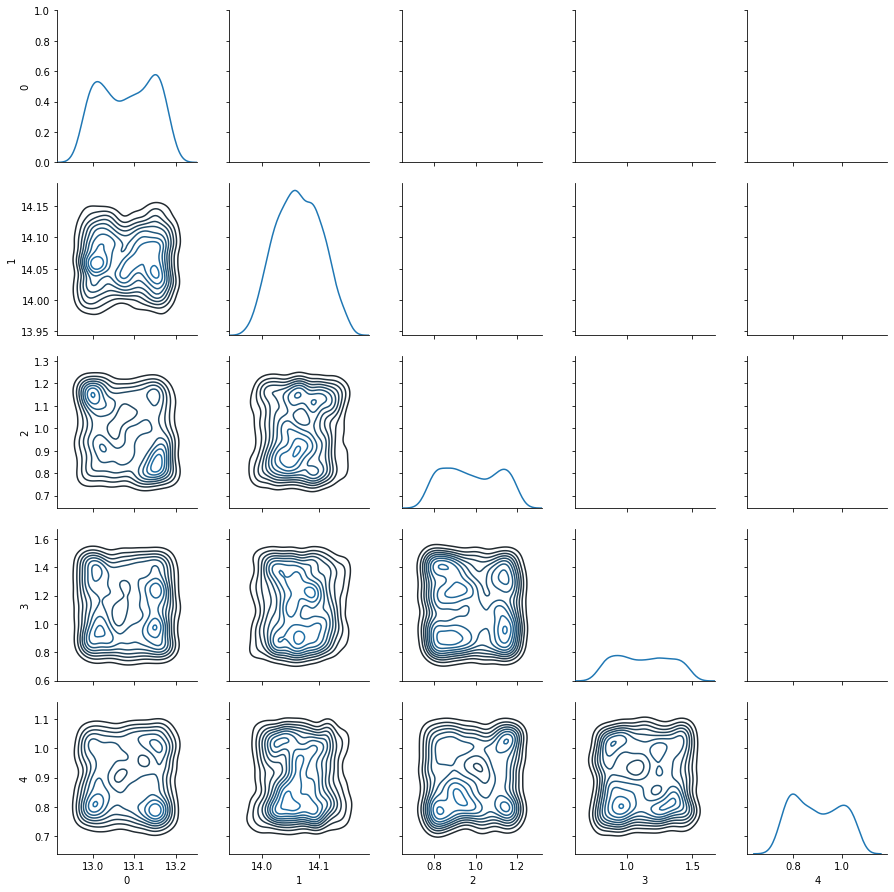

In [36]:
g = sns.PairGrid(y_rf)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

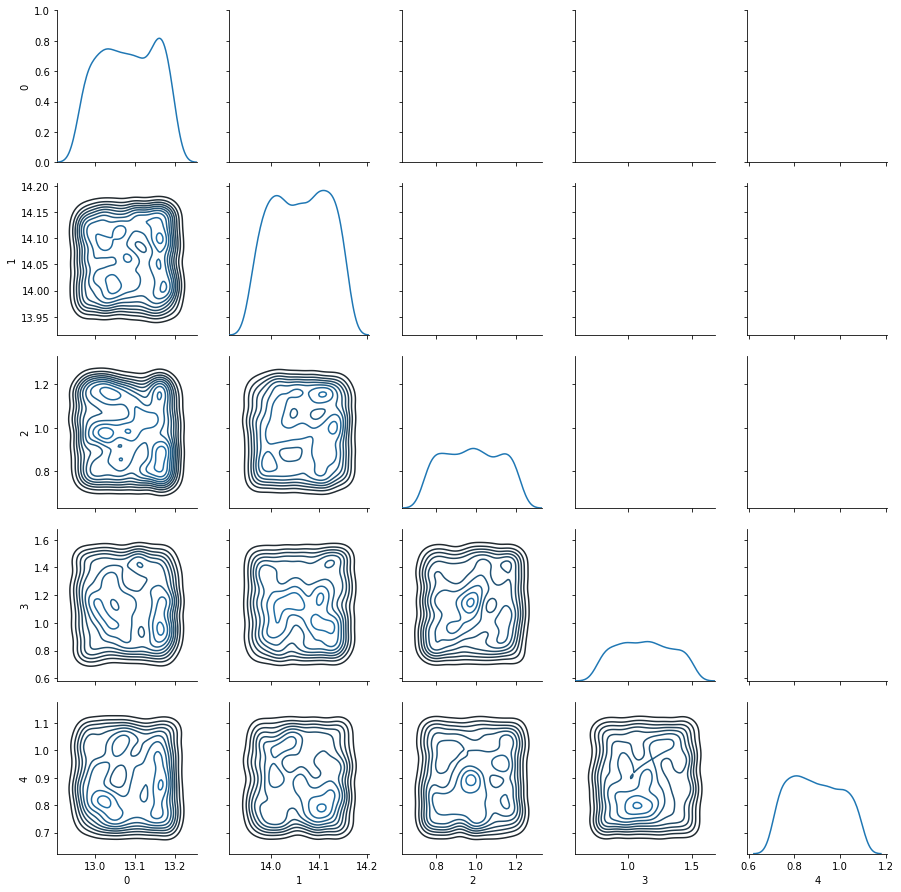

In [37]:
g = sns.PairGrid(y_test)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
plt.tight_layout

(array([ 19.,  64., 121., 143., 170., 140., 152., 116.,  53.,  22.]),
 array([13.97435501, 13.99253232, 14.01070963, 14.02888695, 14.04706426,
        14.06524157, 14.08341888, 14.1015962 , 14.11977351, 14.13795082,
        14.15612814]),
 <a list of 10 Patch objects>)

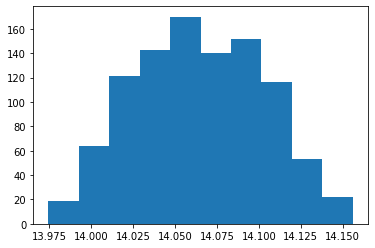

In [38]:
plt.hist(y_rf.iloc[:,1])

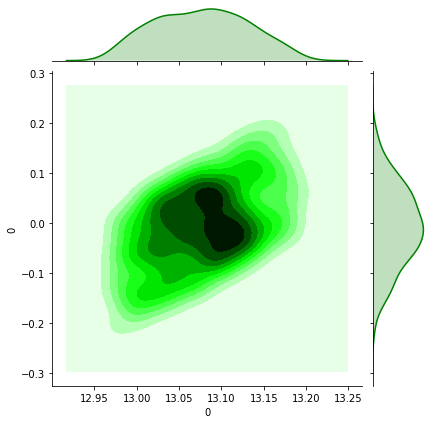

In [267]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

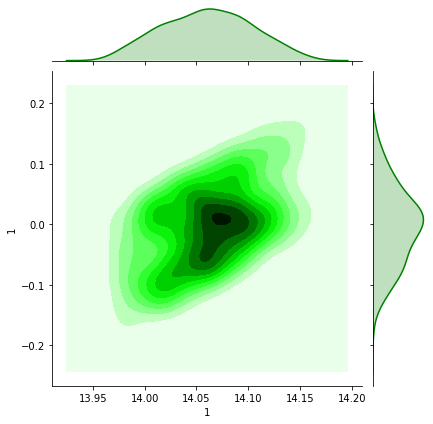

In [268]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

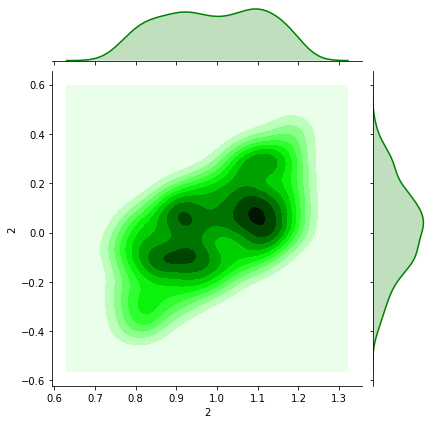

In [269]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

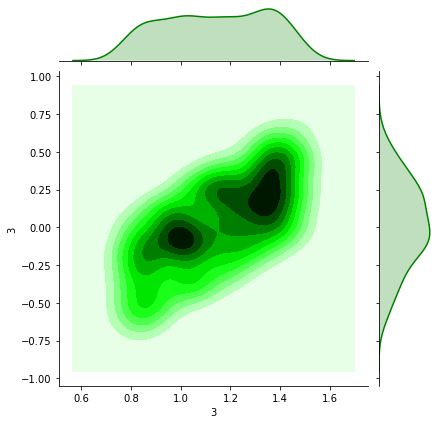

In [270]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

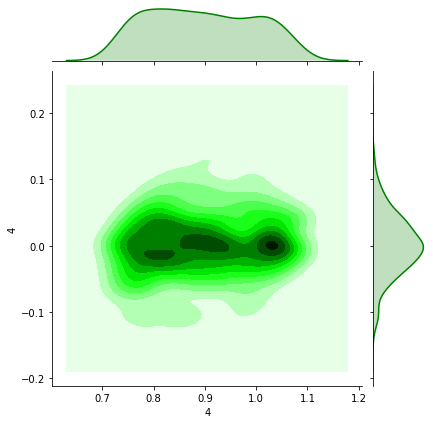

In [271]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')

In [208]:
from xgboost import XGBRegressor

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=100,n_estimators=100, 
                                                         learning_rate=0.1,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)


/home/ajana/.local/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


In [162]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(X_test,y_test)

0   -0.008282
1   -0.044856
2    0.059179
3    3.103494
4    0.032100
dtype: float64


0.5088589917690729

In [210]:
y_multirf = pd.DataFrame(y_multirf)
y_test = pd.DataFrame(y_test)

In [211]:
pd.concat([y_test,y_multirf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,12.986739,13.983835,0.963826,1.312837,0.776013,13.001155,14.027801,0.990299,1.091508,0.761335
1,13.159507,14.093482,1.208545,0.969320,0.861662,13.131726,14.080251,1.111186,1.111855,0.879492
2,12.977591,14.123321,0.780417,0.875823,0.996252,12.978669,14.065083,0.756095,1.226082,0.965988
3,13.186191,14.048419,0.798480,0.971069,0.968582,13.182338,14.060631,0.803810,1.082212,0.915643
4,12.991605,13.990365,0.875567,1.297497,0.864571,12.981359,14.042508,0.854365,1.156004,0.868097
...,...,...,...,...,...,...,...,...,...,...
495,13.018463,14.030535,0.988322,1.490757,0.723209,13.023459,14.050073,0.983808,1.077586,0.755979
496,13.061856,13.998061,1.086599,0.768059,0.992472,13.026598,14.046699,1.002573,1.097815,0.997405
497,13.165332,14.098071,1.144828,1.061505,0.767183,13.151684,14.090430,1.128197,1.172114,0.759393
498,13.154363,14.012922,1.108257,0.867706,0.865585,13.139285,14.039334,1.088087,1.057838,0.877695


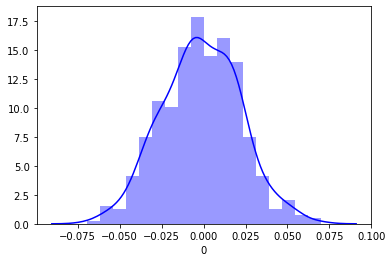

In [212]:
sns.distplot(y_multirf.iloc[:,0]-y_test.iloc[:,0],color='blue')

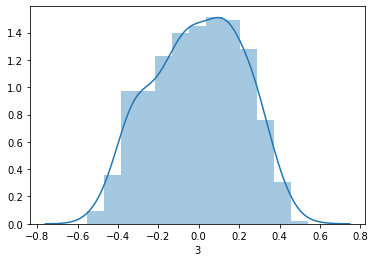

In [156]:
sns.distplot(y_multirf.iloc[:,3]-y_test.iloc[:,3])

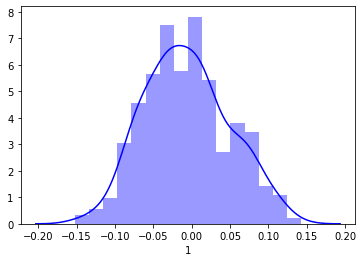

In [157]:
sns.distplot(y_multirf.iloc[:,1]-y_test.iloc[:,1],color='blue')

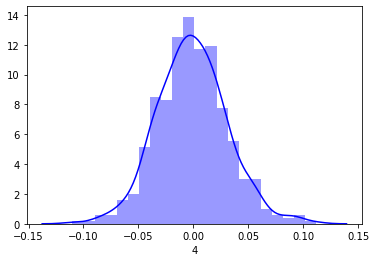

In [159]:
sns.distplot(y_multirf.iloc[:,4]-y_test.iloc[:,4],color='blue')

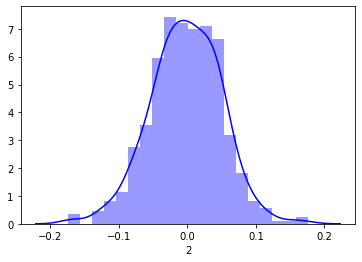

In [160]:
sns.distplot(y_multirf.iloc[:,2]-y_test.iloc[:,2],color='blue')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

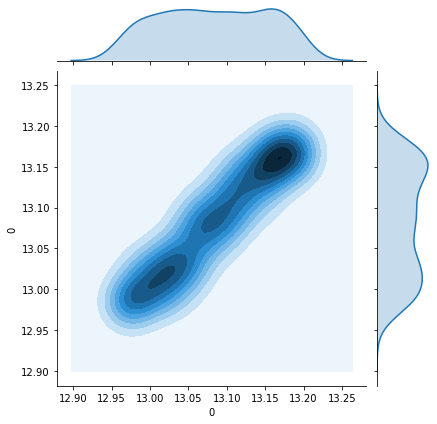

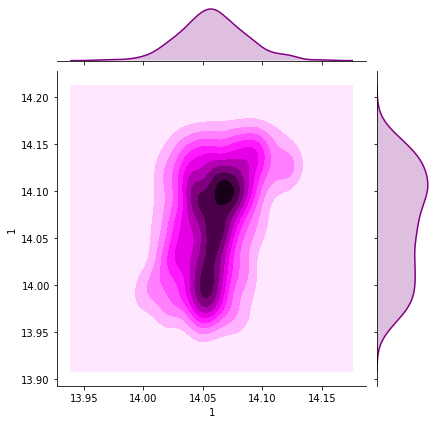

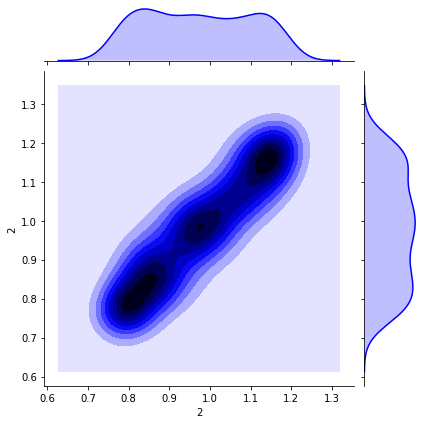

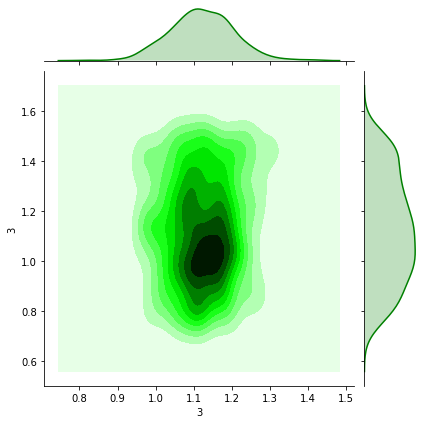

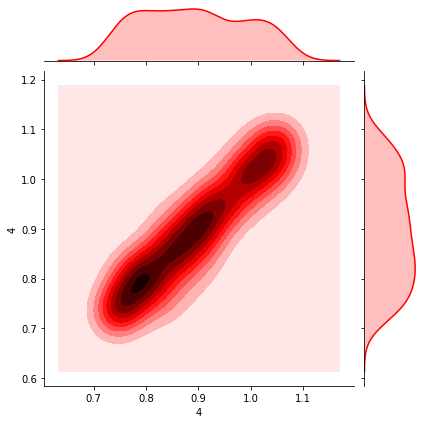

In [213]:
sns.jointplot(y_test.iloc[:,0],y_multirf.iloc[:,0],kind = "kde")
sns.jointplot(y_multirf.iloc[:,1],y_test.iloc[:,1],kind = 'kde',color='purple')
sns.jointplot(y_multirf.iloc[:,2],y_test.iloc[:,2],kind = 'kde',color='blue')
sns.jointplot(y_multirf.iloc[:,3],y_test.iloc[:,3],kind = 'kde',color='green')
sns.jointplot(y_multirf.iloc[:,4],y_test.iloc[:,4],kind = 'kde',color='red')
plt.tight_layout

In [263]:
from sklearn.svm import SVR

#fit multioutput regressor
multioutputsvcregressor = MultiOutputRegressor(SVR(kernel='rbf', degree=3, gamma='auto',
                                                coef0=1.0, tol=0.001, C=1.0, epsilon=0.1, 
                                                shrinking=False, cache_size=400, verbose=False, 
                                                max_iter=-1))
multioutputsvcregressor.fit(X_train, y_train)
# predicting
y_svc = multioutputsvcregressor.predict(X_test)

In [264]:
print (np.mean((y_svc - y_test)*100/(y_test), axis=0))
multioutputsvcregressor.score(X_test,y_test)

0   -0.026757
1   -0.029189
2    2.826130
3    3.192321
4   -0.156301
dtype: float64


0.2095267640507167

In [265]:
y_svc = pd.DataFrame(y_multirf)
y_test = pd.DataFrame(y_test)
pd.concat([y_test,y_svc], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,12.986739,13.983835,0.963826,1.312837,0.776013,13.001155,14.027801,0.990299,1.091508,0.761335
1,13.159507,14.093482,1.208545,0.969320,0.861662,13.131726,14.080251,1.111186,1.111855,0.879492
2,12.977591,14.123321,0.780417,0.875823,0.996252,12.978669,14.065083,0.756095,1.226082,0.965988
3,13.186191,14.048419,0.798480,0.971069,0.968582,13.182338,14.060631,0.803810,1.082212,0.915643
4,12.991605,13.990365,0.875567,1.297497,0.864571,12.981359,14.042508,0.854365,1.156004,0.868097
...,...,...,...,...,...,...,...,...,...,...
495,13.018463,14.030535,0.988322,1.490757,0.723209,13.023459,14.050073,0.983808,1.077586,0.755979
496,13.061856,13.998061,1.086599,0.768059,0.992472,13.026598,14.046699,1.002573,1.097815,0.997405
497,13.165332,14.098071,1.144828,1.061505,0.767183,13.151684,14.090430,1.128197,1.172114,0.759393
498,13.154363,14.012922,1.108257,0.867706,0.865585,13.139285,14.039334,1.088087,1.057838,0.877695


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

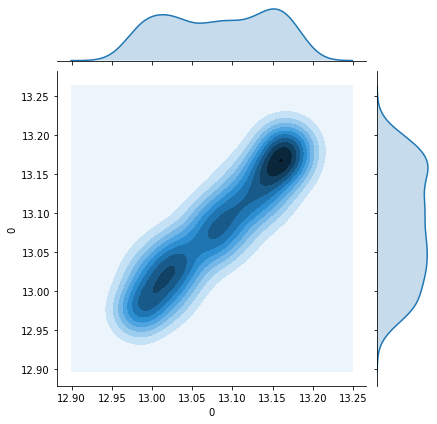

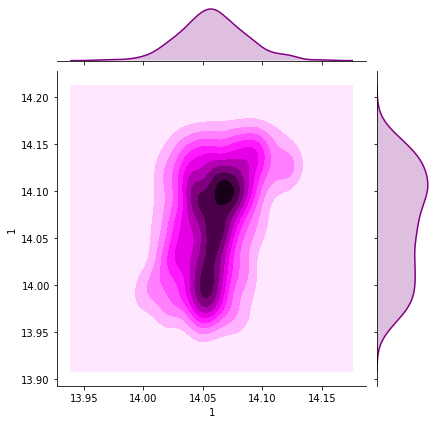

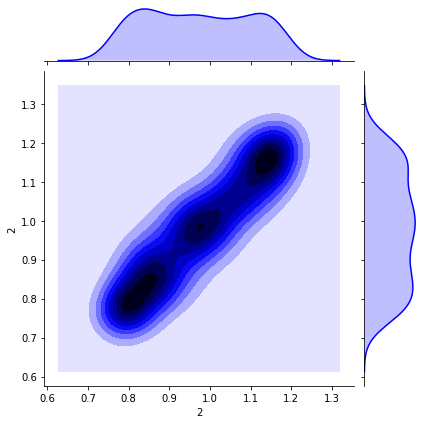

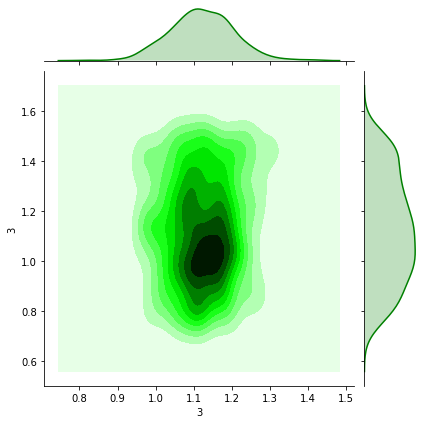

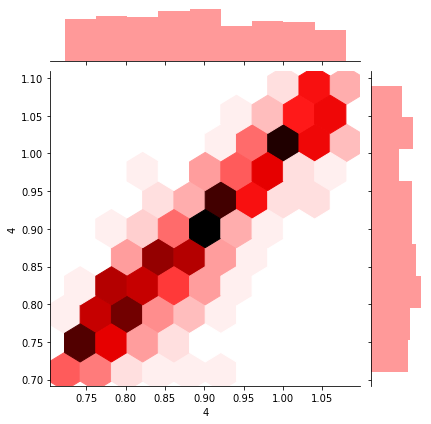

In [296]:
sns.jointplot(y_svc.iloc[:,0],y_test.iloc[:,0],kind = "kde")
sns.jointplot(y_svc.iloc[:,1],y_test.iloc[:,1],kind = 'kde',color='purple')
sns.jointplot(y_svc.iloc[:,2],y_test.iloc[:,2],kind = 'kde',color='blue')
sns.jointplot(y_svc.iloc[:,3],y_test.iloc[:,3],kind = 'kde',color='green')
sns.jointplot(y_svc.iloc[:,4],y_test.iloc[:,4],kind = 'kde',color='red')
plt.tight_layout

In [ ]:
sns.jointplot(y_svc.iloc[:,2],y_svc.iloc[:,3]-y_test.iloc[:,3],kind = 'reg',color='green')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

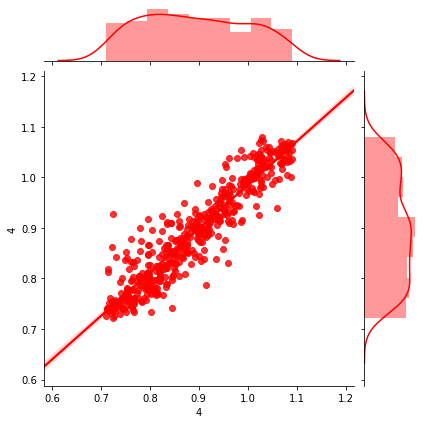